In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from src import *
from utils import NatConst
import gc

In [33]:
""" 
Define natural constants
"""
nat_const = NatConst()

"""
Define the ion chain 
"""
N_ion = 2
MOD_params_dim = [3, 3, 3, 3]   # n_21, n_22
MOD_params_sec = [1.839e6, 1.783e6, 2.038e6, 1.988e6]   # Hz
MOD_params_nm = [
    [0.0, 0.0, 0.7071067811865475, 0.7071067811865476], 
    [0.0, 0.0, 0.7071067811865475, -0.7071067811865476],
    [0.7071067811865475, 0.7071067811865475, 0.0, 0.0], 
    [-0.7071067811865475, 0.7071067811865475, 0.0, 0.0]
]
MOD_params_gamma_heating = [0,0,0,0]
MOD_params_gamma_dephasing = [0,0,0,0]
MOD_params_bath_mean_n = [0,0,0,0]
MOD_params_dict = {"dim": MOD_params_dim, "secular": MOD_params_sec, "n-mode": MOD_params_nm,
                   "heating": MOD_params_gamma_dephasing, "dephasing": MOD_params_gamma_dephasing,
                   "mean_n": MOD_params_bath_mean_n}

# N_ion = 1
# MOD_params_dim = [5, 5]   # n_21, n_22
# MOD_params_sec = [1.8e6, 2.1e6]   # Hz
# MOD_params_nm = [
#     [-0.7071067811865475, 0.7071067811865475], 
#     [0.7071067811865475, 0.7071067811865475]
# ]
# MOD_params_gamma_heating = [0,0]
# MOD_params_gamma_dephasing = [0,0]
# MOD_params_bath_mean_n = [0,0]
# MOD_params_dict = {"dim": MOD_params_dim, "secular": MOD_params_sec, "n-mode": MOD_params_nm,
#                    "heating": MOD_params_gamma_dephasing, "dephasing": MOD_params_gamma_dephasing,
#                    "mean_n": MOD_params_bath_mean_n}

chain_instance = ChainAPI(N_ion, MOD_params_dict)
# print(chain_instance.N_TLS, chain_instance.N_MOD)
# print(chain_instance.base_index_array)

"""
Initialize the quantum state of the ion chain 
"""
INIT_dist = "thermal"   # thermal, non-thermal
INIT_params_mod = [[0, 0],  # n_11, n_12
                   [0, 0]]  # n_21, n_22
INIT_params_tls = [[1, 0], [1, 0]]   # tls_1, tls_2
# INIT_params_mod = [[0.0],
#                    [0.0]]
# INIT_params_tls = [[1, 0]]   # tls_1, tls_2

chain_instance.init_sim_array(INIT_dist, INIT_params_mod, INIT_params_tls)
print(chain_instance.MOD_init_q_list)
# print(chain_instance.CURR_sim_array)
# chain_instance.partial_trace(chain_instance.CURR_sim_array, [4,5])

""" 
Define the external signals
"""
EXT_SIG_on_ion = dict()
for i in range(N_ion):
    EXT_SIG_on_ion[i] = ExtSigAPI(i)

for i in range(N_ion):
    EXT_SIG_on_ion[i].set_laser_params_config([355, "counter", np.pi/2])

EXT_SIG_on_ion[0].set_laser_params_rabi(["constant", [250E3, 250E3]])
EXT_SIG_on_ion[1].set_laser_params_rabi(["constant", [250E3, 250E3]])

detun_val = (1.839e6 + 1.783e6)/2
EXT_SIG_on_ion[0].set_laser_params_detuning(["constant", [detun_val, -detun_val]])
EXT_SIG_on_ion[1].set_laser_params_detuning(["constant", [detun_val, -detun_val]])

Base simulation array created: N_TLS = 2, N_MOD = 4, dimensions [3 3 3 3 3 3 3 3 2 2 2 2]
[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0]]


In [34]:
"""
Instantiate the simulator 
"""
simulator = RunSim()
simulator.construct_ion_chain(chain_instance)
simulator.set_external_signal(EXT_SIG_on_ion)

In [35]:
"""
Consturct matrices
"""
simulator.set_device('cuda')
simulator.construct_propagator_K()
simulator.construct_dissipator_J()

Use NVIDIA GeForce RTX 3090 Ti


In [36]:
# # Example usage
# # Define tensors with shape (a, a, b, b, c, c, ...)
# shape = (2, 2, 3, 3, 4, 4, 5, 5, 2, 2, 2, 2)  
# shape = (3, 3, 5, 5, 2, 2) 
# N_MOD = 2
# tensor1 = np.random.rand(*shape)

# # Generate the einsum string
# einsum_string = generate_sum_product_einsum_string(tensor1.shape, N_MOD)
# print(einsum_string)

# rho_shift_plus, rho_shift_minus = generate_rho_shift_tuples(N_MOD)
# print("plus")
# for i in rho_shift_plus:
#     print(i)
# print("minus")
# for i in rho_shift_minus:
#     print(i)


In [37]:
simulator.execute_evolution(t_tot=50e-6, dt=100e-9)

Set device to cpu
Construct K matrix
Construct J matrix
Start simulation


  0%|          | 0/499 [00:00<?, ?it/s]

In [ ]:
simulator.ION_CHAIN.base_index_array

array([3, 3, 3, 3, 2, 2])

In [ ]:
# population = np.array([np.diag(simulator.ION_CHAIN.partial_trace(simulator.sim_timeline['density'][i], [2]))
#                        for i in range(len(simulator.sim_timeline['density']))])

# plt.plot(np.array(simulator.sim_timeline['time_step'])*1e6, population[:,0])
# plt.plot(np.array(simulator.sim_timeline['time_step'])*1e6, population[:,1])

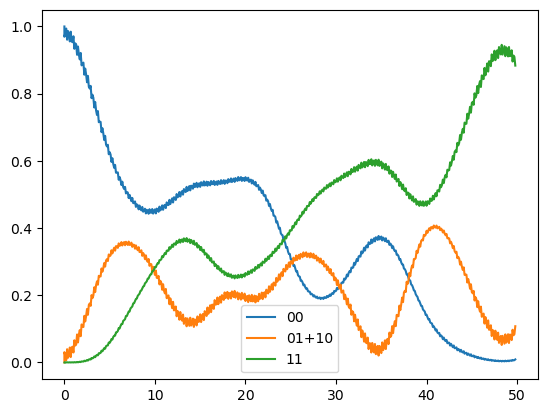

In [ ]:
population = np.array([simulator.ION_CHAIN.partial_trace(simulator.sim_timeline['density'][i], [4,5])
                       for i in range(len(simulator.sim_timeline['density']))])


idx1, idx2 = 0, 0
plt.plot(np.array(simulator.sim_timeline['time_step'])*1e6, population[:,idx1,idx1,idx2,idx2], label='00')
idx1, idx2 = 0, 1
plt.plot(np.array(simulator.sim_timeline['time_step'])*1e6, population[:,idx1,idx1,idx2,idx2] + population[:,idx2,idx2,idx1,idx1], label='01+10')
idx1, idx2 = 1, 1
plt.plot(np.array(simulator.sim_timeline['time_step'])*1e6, population[:,idx1,idx1,idx2,idx2], label='11')
plt.legend(loc='best')
plt.show()

In [ ]:
gc.collect()
torch.cuda.empty_cache()